In [34]:
from tensorflow.keras.datasets import cifar10

In [35]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
#Label	Description
0	"airplane"
1	"automobile"
2	"bird"
3	"cat"
4	"deer"
5	"dog"
6	"frog"
7	"horse"
8	"ship"
9	"truck"

In [19]:
class_names=[
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [37]:
x_train.shape

(50000, 32, 32, 3)

In [38]:
y_train.shape

(50000, 1)

In [39]:
x_test.shape

(10000, 32, 32, 3)

In [40]:
y_test.shape

(10000, 1)

In [41]:
from matplotlib import pyplot as plt

Label :  [7]


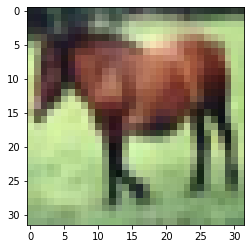

In [42]:
pic_index=7
img = x_train[pic_index]
print("Label : ",y_train[pic_index])
plt.imshow(img)

Label frog


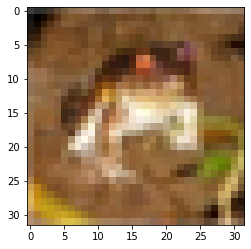

In [43]:
pic_index=0
img=x_train[pic_index]
print("Label", class_names[y_train[pic_index][0]])
plt.imshow(img)

In [44]:
# build model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import layers

num_classes = len(class_names)
model = Sequential()
model.add(Input(shape=(32,32,3)))

#Adding first convolutional layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

#Adding Second convolutional layer
model.add(Conv2D(filters=60,kernel_size=(3,3),activation='relu'))

#Adding first max pooling layer
model.add(MaxPooling2D((2,2)))

#Adding first convolutional layer
model.add(Conv2D(30,kernel_size=(3,3),activation='relu'))

#Adding first convolutional layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))

#Adding second max pooling layer
model.add(MaxPooling2D((2,2)))


#Flatten the ouput from the convolutional layer
model.add(Flatten())

# Add the first fully connected layer with dropout
model.add(Dense(128,activation='relu')) # fully connected
layers.Dropout(0.2)

# Add the first fully connected layer with dropout
model.add(Dense(128,activation='softmax'))
layers.Dropout(0.2)

# Add the output (classification is num_classes which has number of elements to classify)
model.add(Dense(num_classes,activation='softmax'))

#Compile the model
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 60)        34620     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 60)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 30)        16230     
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 32)        8672      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                 

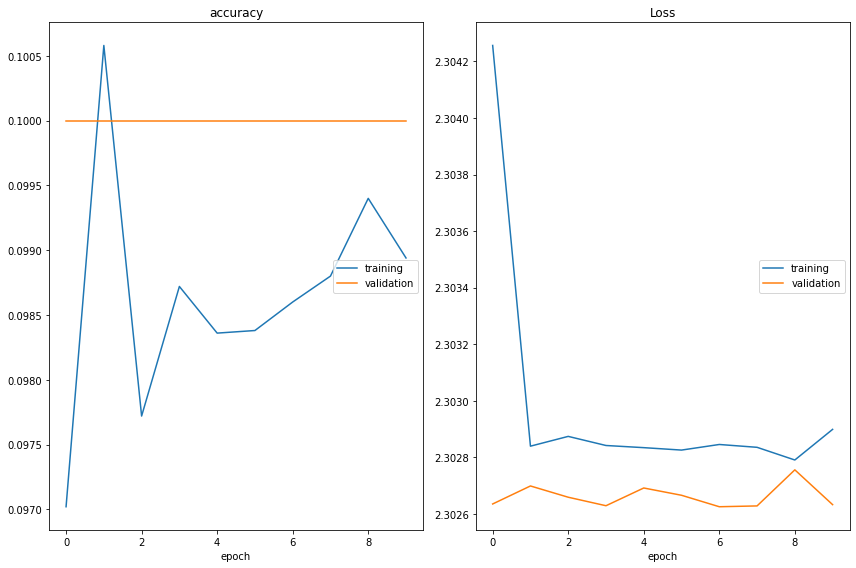

accuracy
	training         	 (min:    0.097, max:    0.101, cur:    0.099)
	validation       	 (min:    0.100, max:    0.100, cur:    0.100)
Loss
	training         	 (min:    2.303, max:    2.304, cur:    2.303)
	validation       	 (min:    2.303, max:    2.303, cur:    2.303)
782/782 [==============================] - 75s 96ms/step - loss: 2.3029 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000


In [46]:
# fit the model
from livelossplot import PlotLossesKerasTF

model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test),callbacks=[PlotLossesKerasTF()])

In [48]:
# Evalute the model

test_loss,test_accuracy = model.evaluate(x_test,y_test)

print("Test Loss : ", test_loss)
print("Test Accuracy : ", test_accuracy)

313/313 [==============================] - 5s 15ms/step - loss: 2.3026 - accuracy: 0.1000
Test Loss :  2.3026323318481445
Test Accuracy :  0.10000000149011612
